In [4]:
import os
# change directory in order to be able to import python scripts from the common package
if os.getcwd().endswith('coinrun'): os.chdir(os.path.expanduser(".."))

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from env import VanillaEnv
from policy import CoinRunActor
from common import plot_evaluation_grid, map_conf_to_index
import pandas as pd

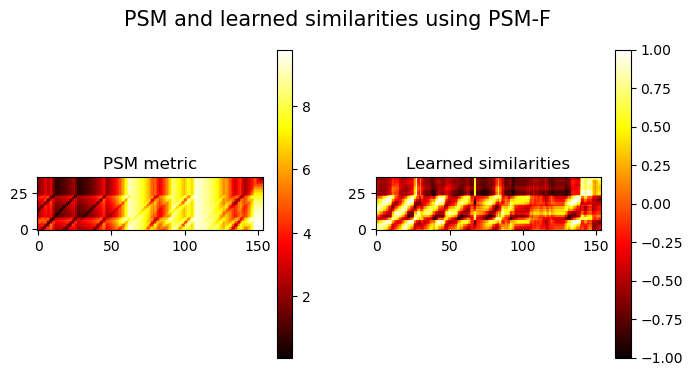

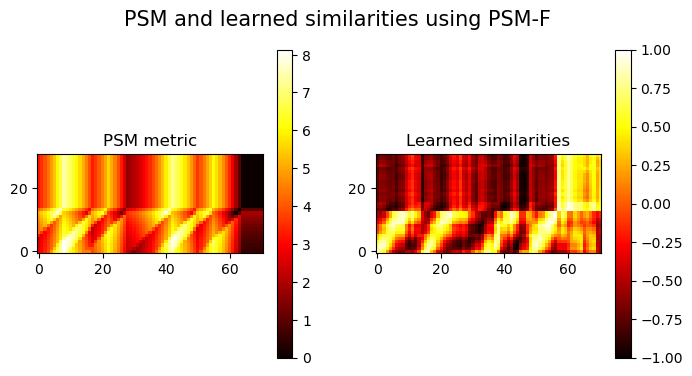

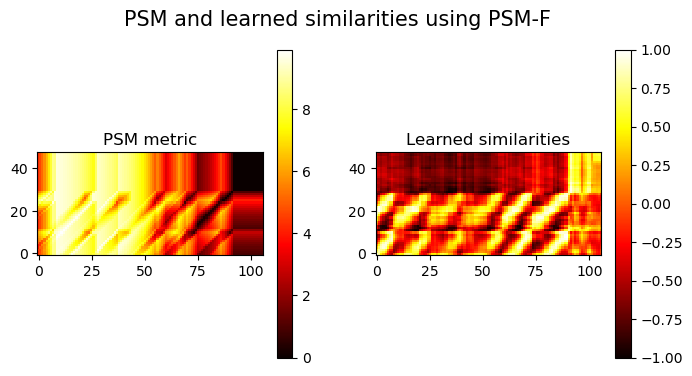

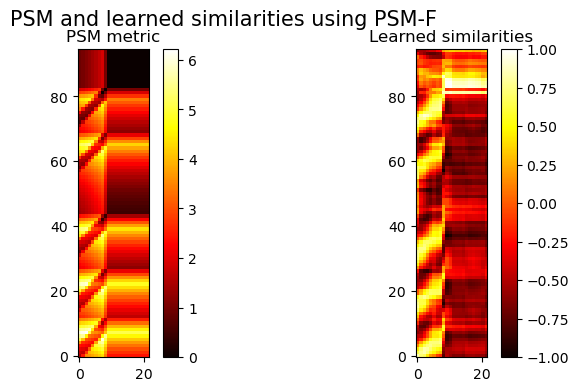

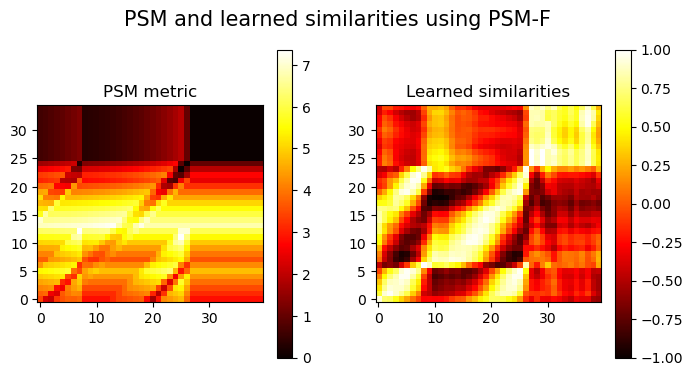

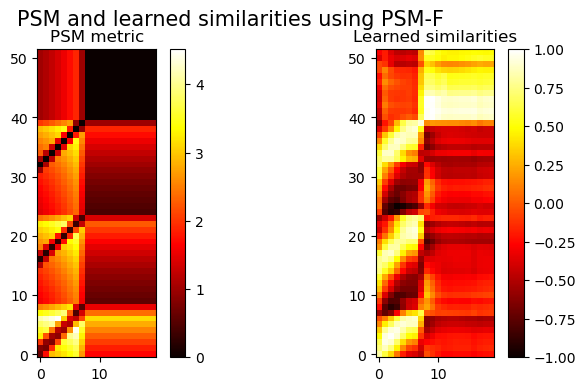

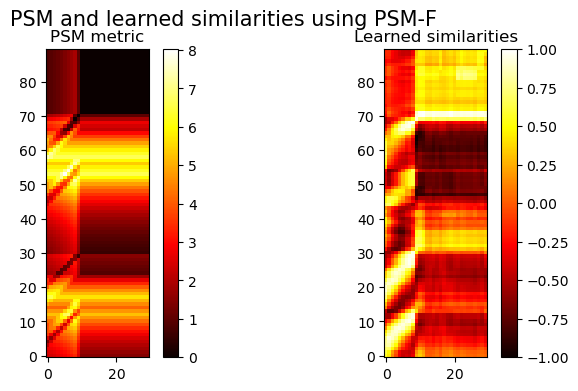

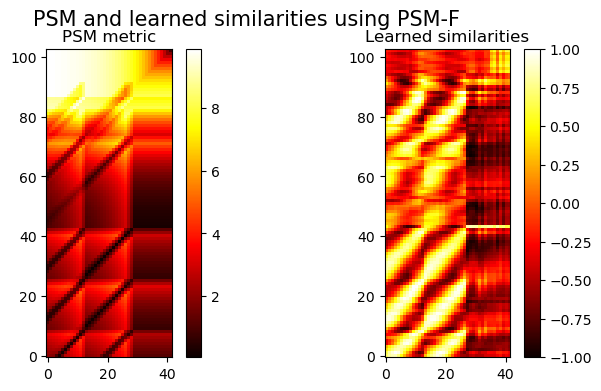

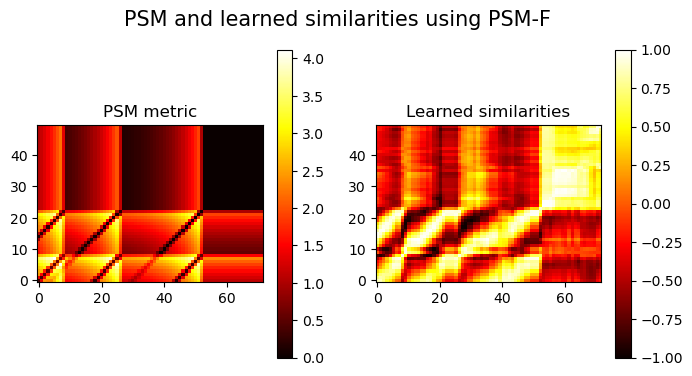

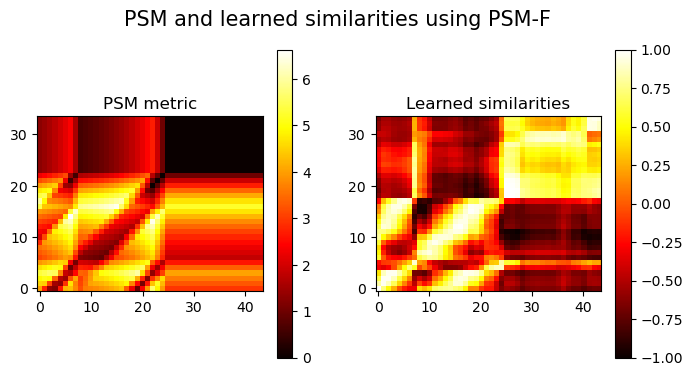

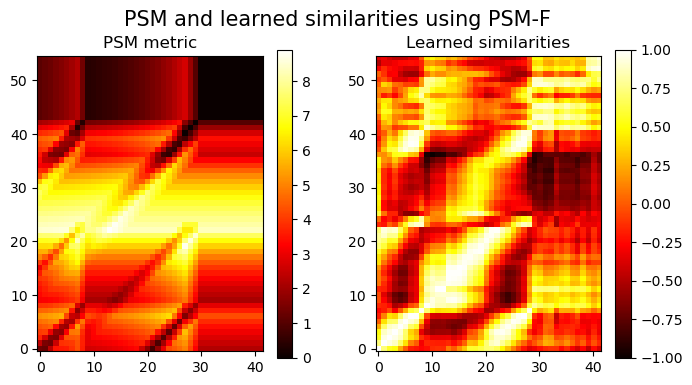

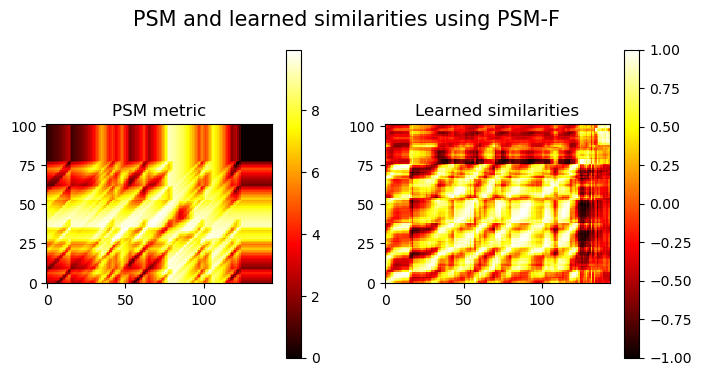

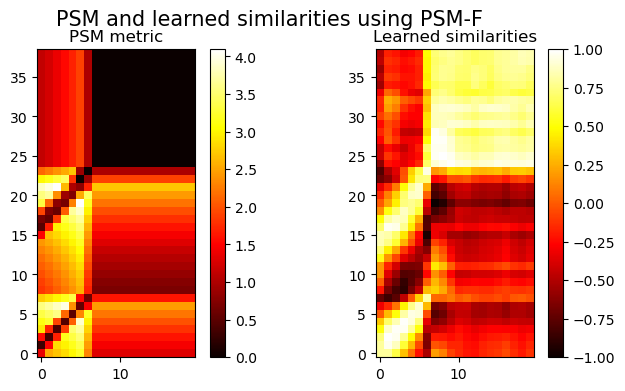

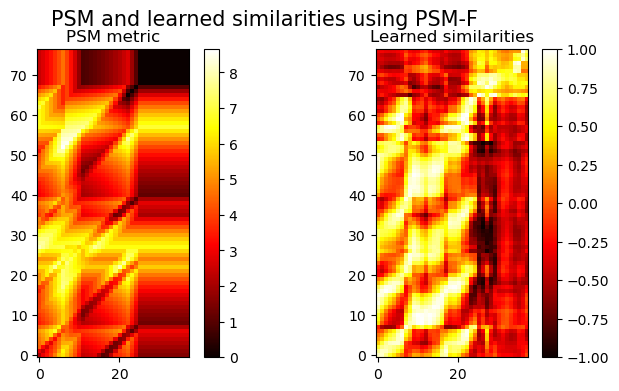

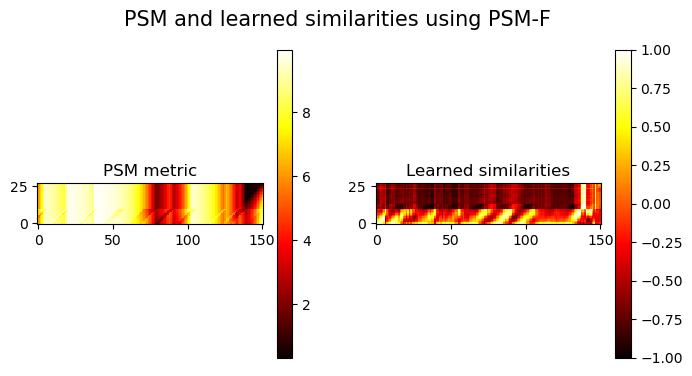

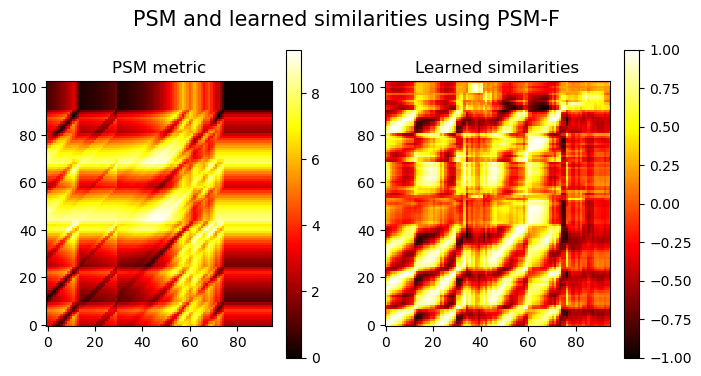

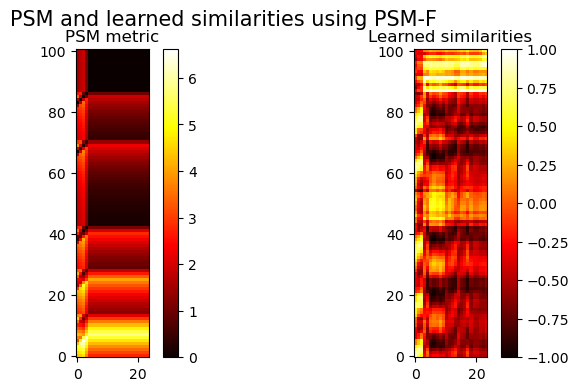

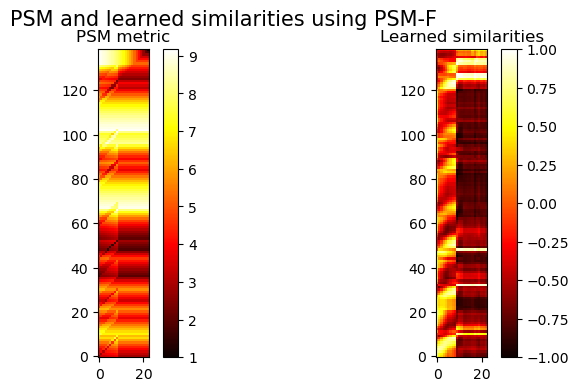

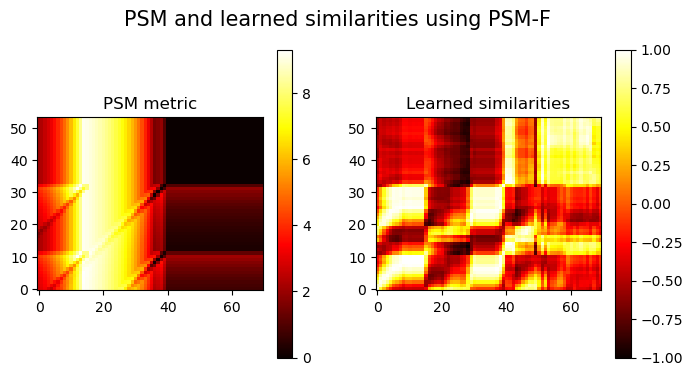

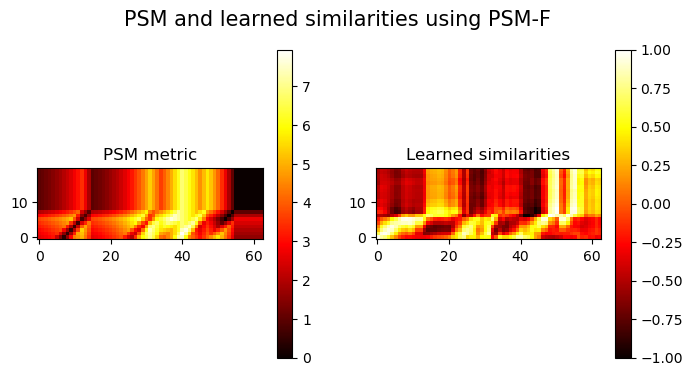

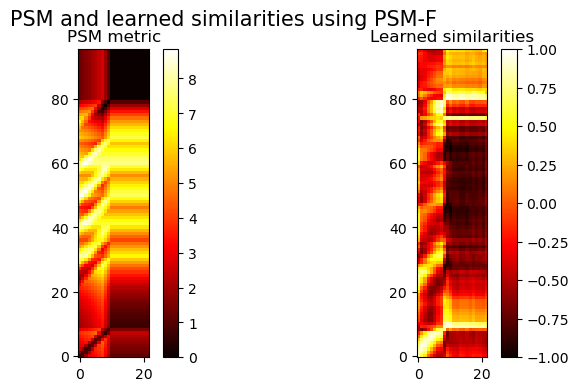

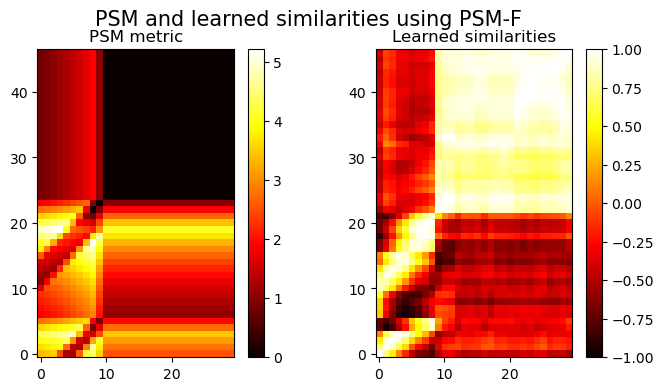

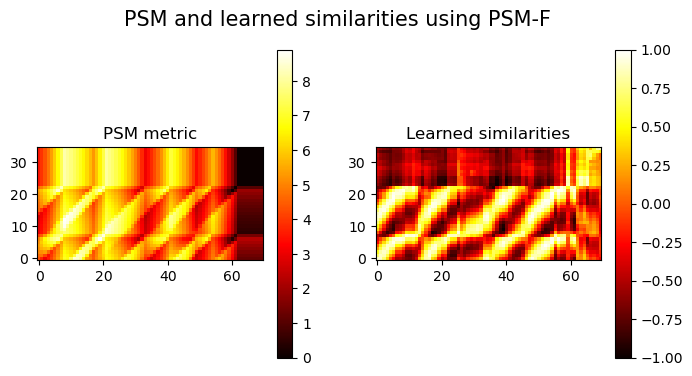

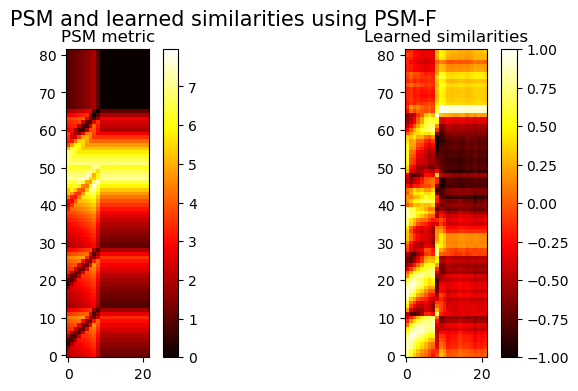

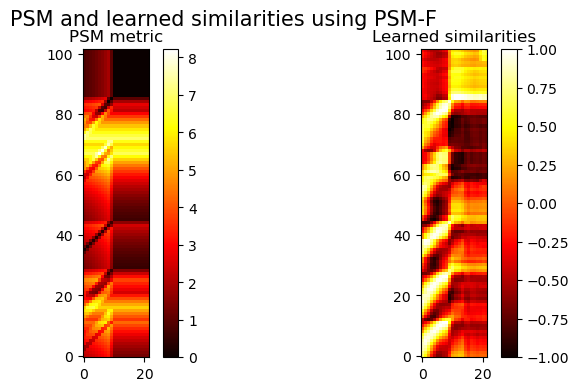

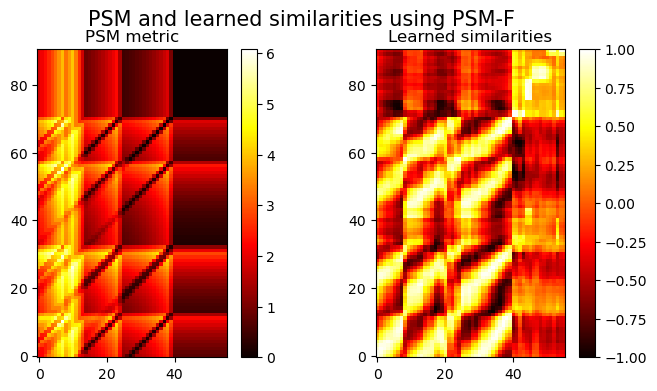

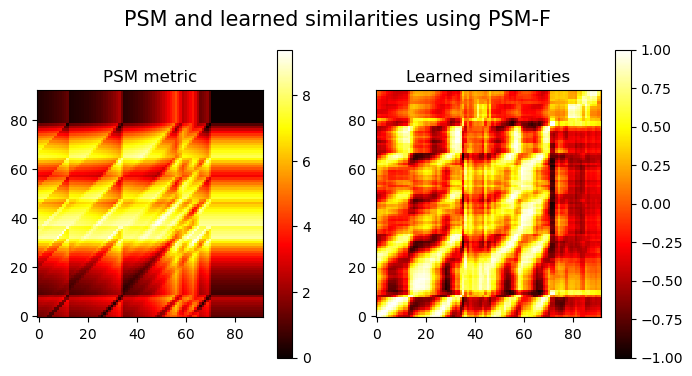

: 

In [8]:
# read in sim matrix and PSM arrays for visualization
folder_name: str = './coinrun/experiments/PSE-F-identity/'
np_files = [n for n in os.listdir(folder_name) if n.endswith('.npz')]
for file_name in np_files:
    with np.load(folder_name + file_name) as data:
        sim_matrix = data['sim_matrix']

        min_val = sim_matrix.min()
        max_val = sim_matrix.max()

        # Define the desired range
        desired_min = -1
        desired_max = 1
        sim_matrix = (sim_matrix - min_val) * (desired_max - desired_min) / (max_val - min_val) + desired_min

        psm_matrix = data['metric_values']
        fig = plt.figure(figsize=(8,4))

        plot1 = fig.add_subplot(1, 2, 1)
        im = plot1.imshow(psm_matrix, origin='lower', cmap='hot', interpolation='nearest')
        plot1.set_title("PSM metric")
        fig.colorbar(im, ax=plot1)


        plot2 = fig.add_subplot(1, 2, 2)
        plot2.set_title("Learned similarities")
        im = plot2.imshow(sim_matrix, origin='lower', cmap='hot', interpolation='nearest')
        fig.colorbar(im, ax=plot2)
        fig.suptitle("PSM and learned similarities using PSM-F", fontsize=15)
        plt.savefig(folder_name + file_name.replace('.npz', '.svg'))
        plt.show()
        
